In [ ]:
## index_numbers
## group_number
## names

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../artifacts/hotel_bookings.csv')

In [4]:
## Data Preprocessing

In [5]:
data.shape

(119390, 32)

In [6]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
columns_to_drop = ['hotel', 'lead_time', 'adults', 'children', 'babies', 'country', 'market_segment',
                    'distribution_channel', 'previous_bookings_not_canceled', 'assigned_room_type', 
                    'deposit_type', 'agent', 'company', 'adr', 'reservation_status_date']
data = data.drop(columns=columns_to_drop)
data

,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,is_repeated_guest,previous_cancellations,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status
0,0,2015,July,27,1,0,0,BB,0,0,C,3,0,Transient,0,0,Check-Out
1,0,2015,July,27,1,0,0,BB,0,0,C,4,0,Transient,0,0,Check-Out
2,0,2015,July,27,1,0,1,BB,0,0,A,0,0,Transient,0,0,Check-Out
3,0,2015,July,27,1,0,1,BB,0,0,A,0,0,Transient,0,0,Check-Out
4,0,2015,July,27,1,0,2,BB,0,0,A,0,0,Transient,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,2017,August,35,30,2,5,BB,0,0,A,0,0,Transient,0,0,Check-Out
119386,0,2017,August,35,31,2,5,BB,0,0,E,0,0,Transient,0,2,Check-Out
119387,0,2017,August,35,31,2,5,BB,0,0,D,0,0,Transient,0,4,Check-Out
119388,0,2017,August,35,31,2,5,BB,0,0,A,0,0,Transient,0,0,Check-Out


In [9]:
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}
meal_mapping = {
    'BB': 1,
    'FB': 2,
    'HB': 3,
    'SC': 4,
    'Undefined': 0
}
room_type_mapping = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7,
    'H': 8,
    'L': 9,
    'P': 10
}
customer_type_mapping = {
    'Transient': 1,
    'Contract': 2,
    'Transient-Party': 3,
    'Group': 4
}
reservation_status_mapping = {
    'Check-Out': 1,
    'Canceled': 2,
    'No-Show': 3
}

data['arrival_date_month'] = data['arrival_date_month'].map(month_mapping)
data['meal'] = data['meal'].map(meal_mapping)
data['reserved_room_type'] = data['reserved_room_type'].map(room_type_mapping)
data['customer_type'] = data['customer_type'].map(customer_type_mapping)
data['reservation_status'] = data['reservation_status'].map(reservation_status_mapping)
data

,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,is_repeated_guest,previous_cancellations,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status
0,0,2015,7,27,1,0,0,1,0,0,3,3,0,1,0,0,1
1,0,2015,7,27,1,0,0,1,0,0,3,4,0,1,0,0,1
2,0,2015,7,27,1,0,1,1,0,0,1,0,0,1,0,0,1
3,0,2015,7,27,1,0,1,1,0,0,1,0,0,1,0,0,1
4,0,2015,7,27,1,0,2,1,0,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,2017,8,35,30,2,5,1,0,0,1,0,0,1,0,0,1
119386,0,2017,8,35,31,2,5,1,0,0,5,0,0,1,0,2,1
119387,0,2017,8,35,31,2,5,1,0,0,4,0,0,1,0,4,1
119388,0,2017,8,35,31,2,5,1,0,0,1,0,0,1,0,0,1


In [10]:
X = data.drop(columns = 'is_canceled')
y = data['is_canceled']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3)

In [13]:
X_train.shape

(83573, 16)

In [15]:
X_test.shape

(35817, 16)

In [16]:
y_train.value_counts()

is_canceled
0    52716
1    30857
Name: count, dtype: int64

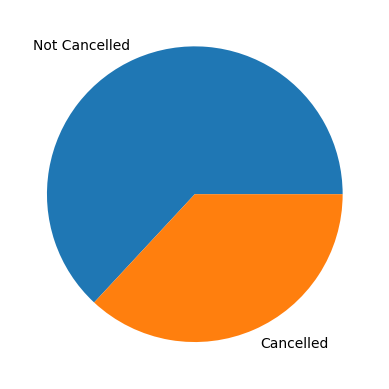

In [17]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels= ['Not Cancelled', 'Cancelled'])
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
#logistic regression

In [20]:
from sklearn.linear_model import  LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [21]:
log_reg.predict(X_train_scaled)

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [22]:
log_reg.score(X_train_scaled, y_train)

1.0

In [23]:
log_reg.score(X_test_scaled, y_test)

1.0

In [24]:
#support vector machine

In [25]:
from sklearn.svm import  SVC
svm = SVC()
svm.fit(X_train_scaled, y_train)

SVC()

In [30]:
y_train_pred = svm.predict(X_train_scaled)
train_accuracy = svm.score(X_train_scaled, y_train)
train_accuracy

0.9999880344130281

In [32]:
test_predictions = svm.predict(X_test_scaled)
test_accuracy = svm.score(X_test_scaled, y_test)
test_accuracy

0.9999441605941313

In [33]:
#gridsearchCV

In [37]:
from sklearn.model_selection import GridSearchCV
param_grid = { 'C': [0.1,1,10], 'kernel':['rbf','linear','poly']}
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid)
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['rbf', 'linear', 'poly']})

In [38]:
grid_search.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [40]:
grid_search.score(X_test, y_test)

1.0

In [41]:
import pickle
with open('../static/model/tmodel.pickle', 'wb') as file:
    pickle.dump(log_reg, file)